<a href="https://colab.research.google.com/github/Rachit304/Machine-Leaning/blob/main/CAT1_2147225.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Q-1

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading csv file

In [ ]:
df = pd.read_csv('India_Menu - India_Menu.csv')

In [ ]:
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


Check for NULL value

In [ ]:
df.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

Fill  Null values

In [ ]:
mean = df['Sodium (mg)'].mean
df['Sodium (mg)'].fillna(value=mean,inplace = True)

In [ ]:
df.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               0
dtype: int64

In [ ]:
df.dtypes

Menu Category              object
Menu Items                 object
Per Serve Size             object
Energy (kCal)             float64
Protein (g)               float64
Total fat (g)             float64
Sat Fat (g)               float64
Trans fat (g)             float64
Cholesterols (mg)         float64
Total carbohydrate (g)    float64
Total Sugars (g)          float64
Added Sugars (g)          float64
Sodium (mg)                object
dtype: object

In the Given Data set Different Menu Categories wll be depended aupon the Energy,protein, fat etc. 


**So Menu Category will be the class attribute for the given data set**

In [ ]:
df.rename(columns = {'Menu Category':'Menu_Category'}, inplace = True)
df['Menu_Category'].unique()

array(['Regular Menu', 'Breakfast Menu', 'McCafe Menu', 'Desserts Menu',
       'Gourmet Menu', 'Beverages Menu', 'Condiments Menu'], dtype=object)

Converting String to Integer

In [ ]:
df.Menu_Category.replace(('Regular Menu', 'Breakfast Menu', 'McCafe Menu', 'Desserts Menu',
       'Gourmet Menu', 'Beverages Menu', 'Condiments Menu'), (0,1,2,3,4,5,6), inplace=True)
df.head

<bound method NDFrame.head of      Menu_Category              Menu Items Per Serve Size  Energy (kCal)  \
0                0        McVeggie™ Burger          168 g         402.05   
1                0    McAloo Tikki Burger®          146 g         339.52   
2                0  McSpicy™ Paneer Burger          199 g         652.76   
3                0       Spicy Paneer Wrap          250 g         674.68   
4                0     American Veg Burger          177 g         512.17   
..             ...                     ...            ...            ...   
136              6  Tomato Ketchup Sachets            8 g          11.23   
137              6             Maple Syrup           30 g          86.40   
138              6            Cheese Slice           14 g          51.03   
139              6              Sweet Corn           40 g          45.08   
140              6    Mixed Fruit Beverage         180 ml          72.25   

     Protein (g)  Total fat (g)  Sat Fat (g)  Trans fat (

deviding the data set into dependent and independent attributes

In [ ]:
target = df['Menu_Category']
inputs = df[['Energy (kCal)','Protein (g)','Total fat (g)','Sat Fat (g)','Trans fat (g)','Cholesterols (mg)','Total carbohydrate (g)','Total Sugars (g)','Added Sugars (g)','Sodium (mg)']]

Splitting the data set into traing data and testing data (80%)

In [ ]:
from sklearn.model_selection import train_test_split
y_train,y_test,X_train,X_test = train_test_split(inputs,target,test_size=0.2)

creating object of GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB  
model = GaussianNB()

**In Naive Bayes Theorem the Bayes probablity is calculated for each variable and than based on the probablity the value of class attribute is predicted**

In [ ]:
X_train[:10]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
196,6,5,apr,thu,81.5,9.1,55.2,2.7,5.8,54,5.8,0.0,10.93
25,7,4,aug,sun,91.4,142.4,601.4,10.6,16.3,60,5.4,0.0,0.00
284,5,4,feb,fri,85.2,4.9,15.8,6.3,7.5,46,8.0,0.0,24.24
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53
134,3,5,mar,tue,88.1,25.7,67.6,3.8,14.9,38,2.7,0.0,0.00
34,6,3,sep,mon,91.8,78.5,724.3,9.2,21.2,32,2.7,0.0,0.00
131,4,6,mar,mon,87.2,23.9,64.7,4.1,14.0,39,3.1,0.0,0.00
423,1,3,sep,sat,91.2,94.3,744.4,8.4,22.3,48,4.0,0.0,0.72
247,2,4,aug,wed,92.2,91.6,503.6,9.6,20.7,70,2.2,0.0,0.75
78,1,2,aug,fri,90.1,108.0,529.8,12.5,14.7,66,2.7,0.0,0.00


In [ ]:
model.fit(X_train,y_train)

ValueError: ignored

Predict Menu_caegory based on Inputs

In [ ]:
predict = model.predict(X_test)
predict

array([1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 5, 0, 6, 5, 0, 0, 4, 0, 6, 6, 5, 4,
       2, 1, 0, 0, 2, 6, 2])

In [ ]:
model.score(X_test,y_test)

0.8275862068965517

In [ ]:
probab = model.predict_proba(X_test)
probab

array([[1.72058903e-001, 8.27941097e-001, 8.52127304e-081,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.53654778e-001, 8.46341536e-001, 3.68665349e-006,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [7.57694010e-020, 2.15242114e-005, 9.99978476e-001,
        0.00000000e+000, 0.00000000e+000, 2.02700763e-042],
       [1.60040863e-005, 1.98159445e-004, 9.99785836e-001,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [9.96843269e-002, 9.00315673e-001, 2.10080389e-086,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.03177317e-001, 8.96822683e-001, 6.03122443e-069,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [2.16955464e-001, 7.83044536e-001, 3.29691997e-125,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [9.99999999e-001, 5.00224355e-010, 2.84068300e-140,
        2.49552300e-015, 0.00000000e+000, 0.00000000e+000],
       [6.59689791e-009, 8.15046930e-003, 9.9184

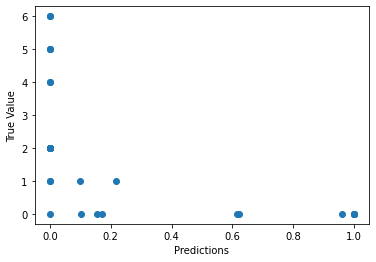

In [ ]:
plt.scatter(probab[:,0],y_test)
plt.xlabel("Predictions")
plt.ylabel("True Value")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)
cm

array([[7, 3, 0, 0, 0, 1],
       [0, 3, 0, 0, 0, 1],
       [0, 0, 7, 0, 0, 0],
       [0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 2]])

Text(42.0, 0.5, 'Truth')

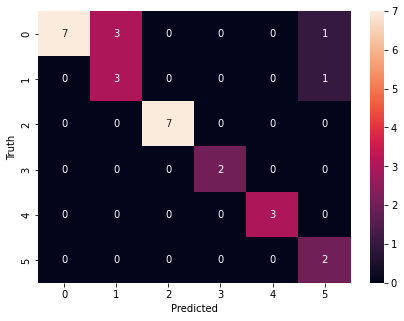

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Hence from the Heatmap we can say that over 90% of the values of class attribute predicted by computer is correct

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.50      0.75      0.60         4
           2       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       0.50      1.00      0.67         2

    accuracy                           0.83        29
   macro avg       0.83      0.90      0.84        29
weighted avg       0.90      0.83      0.84        29



#Q-2

---



In [ ]:
ff = pd.read_csv('forestfires1 - forestfires1.csv')
ff.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
X_train,X_test = train_test_split(ff,test_size=0.2)

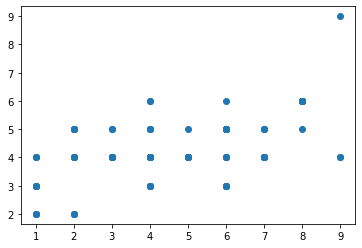

In [ ]:
plt.scatter(X_test['X'],X_test['Y'])

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [ ]:
y_predicted = km.fit_predict(X_test[['X','Y']])
y_predicted

array([2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0,
       2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1,
       1, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1,
       1, 2, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2], dtype=int32)

In [ ]:
X_test['Cluster'] = y_predicted
X_test.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Cluster
490,4,4,aug,wed,95.1,141.3,605.8,17.7,28.7,33,4.0,0.0,0.00,2
219,6,5,mar,mon,90.1,39.7,86.6,6.2,15.2,27,3.1,0.0,31.86,2
246,5,4,aug,sun,91.8,175.1,700.7,13.8,25.7,39,5.4,0.0,0.09,2
328,6,5,sep,sat,92.2,102.3,751.5,8.4,19.7,35,1.8,0.0,0.00,2
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1


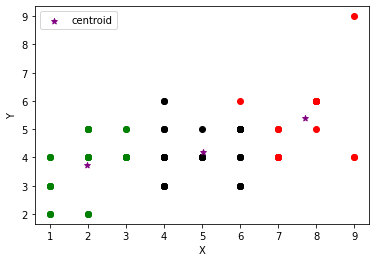

In [ ]:
df1 = X_test[X_test.Cluster == 0]
df2 = X_test[X_test.Cluster == 1]
df3 = X_test[X_test.Cluster == 2]
plt.scatter(df1.X,df1['Y'],color="Green")
plt.scatter(df2.X,df2['Y'],color="Red")
plt.scatter(df3.X,df3['Y'],color="Black")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = "purple",marker="*",label="centroid")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [ ]:
km.cluster_centers_

array([[1.96875   , 3.71875   ],
       [7.71428571, 5.39285714],
       [5.02272727, 4.18181818]])

In [ ]:
k_rng = range(1,10)
arr = []
for k in k_rng:
  km=KMeans(n_clusters = k)
  km.fit(X_test[['X','Y']])
  arr.append(km.inertia_)

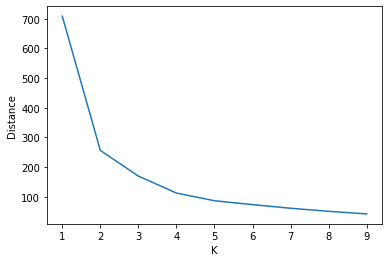

In [ ]:
plt.xlabel('K')
plt.ylabel('Distance')
plt.plot(k_rng,arr)

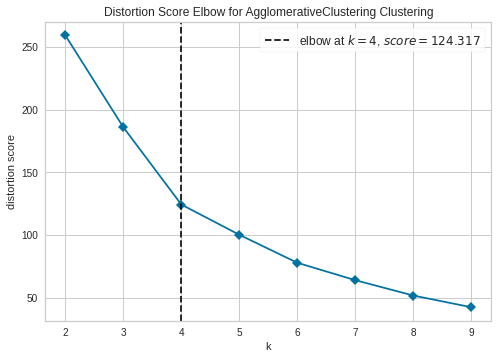

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
# Fit data to visualizer
visualizer.fit(X_test[['X','Y']])
# Finalize and render figure
visualizer.show()

# Q- 3

In [ ]:
ff.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Some statistical data related to dataset

In [ ]:
ff.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Range and mean of X and Y

**Temperature change variation monthwise..also to find the Hotest Month**

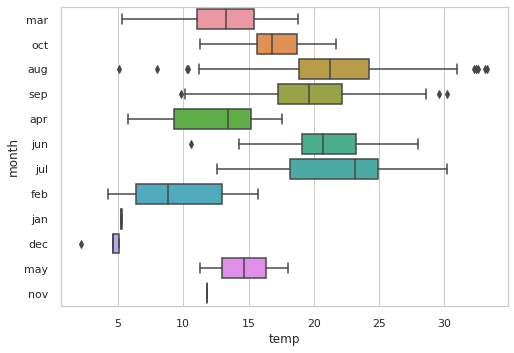

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x="temp",
                y="month",
                data=ff)

**Month wise distribution of FMCC**




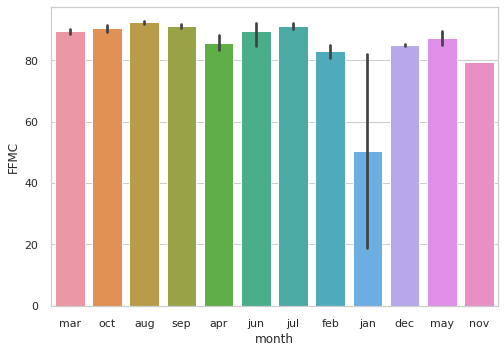

In [ ]:
sns.barplot(x="month", y="FFMC", data=ff)

**Average change on DMC daywise**

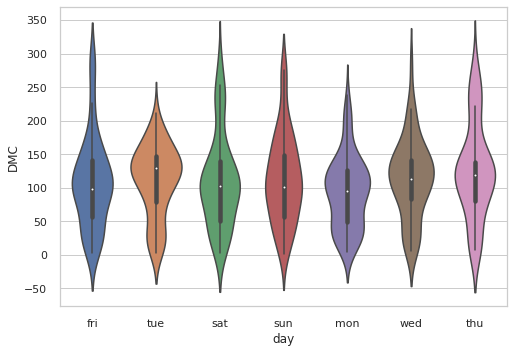

In [ ]:
sns.violinplot(x="day", y="DMC", data=ff)

The values of X and Y

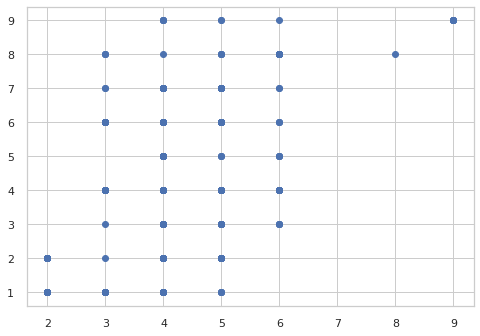

In [ ]:
plt.scatter(x="Y",y="X",data=ff)

**For Nominal Data**


In [ ]:
ff1 = ff.groupby(['month']).mean()
ff1

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
month,,,,,,,,,,,
apr,5.777778,4.222222,85.788889,15.911111,48.555556,5.377778,12.044444,46.888889,4.666667,0.000000,8.891111
aug,4.483696,4.282609,92.336957,153.732609,641.077717,11.072283,21.631522,45.489130,4.086413,0.058696,12.489076
dec,4.555556,5.000000,84.966667,26.122222,351.244444,3.466667,4.522222,38.444444,7.644444,0.000000,13.330000
feb,5.150000,4.400000,82.905000,9.475000,54.670000,3.350000,9.635000,55.700000,3.755000,0.000000,6.275000
jan,3.000000,4.500000,50.400000,2.400000,90.350000,1.450000,5.250000,89.000000,2.000000,0.000000,0.000000
jul,5.218750,4.593750,91.328125,110.387500,450.603125,9.393750,22.109375,45.125000,3.734375,0.006250,14.369687
jun,6.294118,4.823529,89.429412,93.382353,297.705882,11.776471,20.494118,45.117647,4.135294,0.000000,5.841176
mar,4.722222,4.481481,89.444444,34.542593,75.942593,7.107407,13.083333,40.000000,4.968519,0.003704,4.356667
may,5.000000,4.000000,87.350000,26.700000,93.750000,4.600000,14.650000,67.000000,4.450000,0.000000,19.240000


**Monthwise mean Distribution of DC**


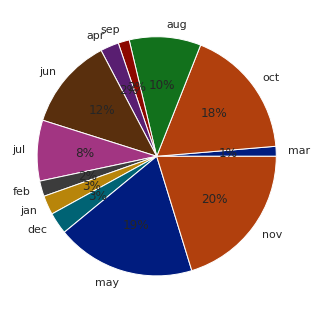

In [ ]:
ff1 = ff.groupby(['month']).mean()
keys = ['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
        'dec', 'may', 'nov']
data =ff1.DC

palette_color = sns.color_palette('dark')
  
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

**Month wise mean distribution of ISI**

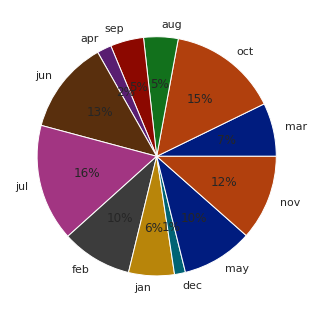

In [ ]:
ff1 = ff.groupby(['month']).mean()
keys = ['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
        'dec', 'may', 'nov']
data =ff1.ISI

palette_color = sns.color_palette('dark')
  
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

In [ ]:
keys = [ff['month'].unique()]
keys


[array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
        'dec', 'may', 'nov'], dtype=object)]